# Finds optical events in a video file

### Imports

In [1]:
# Python standard library
import sys
import os

# Scientific computing
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', '')
sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/oi/')
import optical_imaging as oi
import oi_file

# Jupyter
from IPython.display import HTML

### Load data

In [2]:
# Define file path
data_base_path = '/home/prestonh/Desktop/Research/cancer_cells/data'
date = '/7-19-2017'
particle_type = '/293-T'
channel_type = '/15-30-15_4'
file_index = '1'
file_path = data_base_path + date + particle_type + channel_type + '/oi/bin/test_camera_' + file_index

# Set output file path
output_file_path = file_path + '_events.json'

# Open video
res_x = 512
res_y = 288
fps = 100000
exp = 5
oi_vid = oi_file.Video(file_path, res_x, res_y, fps, exp)

### Functions

In [3]:
blur_kernel = (15,15)

def preprocess_frame(frame, blur_kernel):
    
    # Gaussian blur
    frame = cv2.GaussianBlur(frame, blur_kernel, 0)
        
    return frame

In [4]:
def plot_frame(frame, show = True):
    plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
    if show:
        plt.show()

### Create template frame and check preprocessing

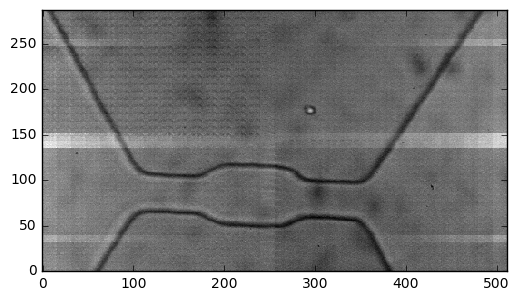

In [5]:
template_index = 150

template_frame = oi_vid.get_frame(template_index)
plot_frame(template_frame)

### Find frame w/ particle

In [7]:


threshold_difference = 0.005

start_frame = 0

num_found = 0

template_frame = preprocess_frame(oi_vid.get_frame(template_index), blur_kernel)


for i in range(start_frame, oi_vid._total_frames):
    
    
    if i%1000 == 0:
        print 'i = ', i
    
    
    frame = preprocess_frame(oi_vid.get_frame(i), blur_kernel)
    clusters = oi.find_clusters_percentage_based(frame, template_frame, cluster_threshold = 50, threshold_difference = threshold_difference, connect = True, connect_threshold = 25)
    if(len(clusters)) > 0:
        print 'event frame', i
        num_found+=1
        if num_found > 100:
            break
            pass
            

i =  0
i =  1000
i =  2000
event frame 2536
event frame 2718
event frame 2719
event frame 2720
event frame 2722


KeyboardInterrupt: 

### Test template subtraction

detected clusters =  0


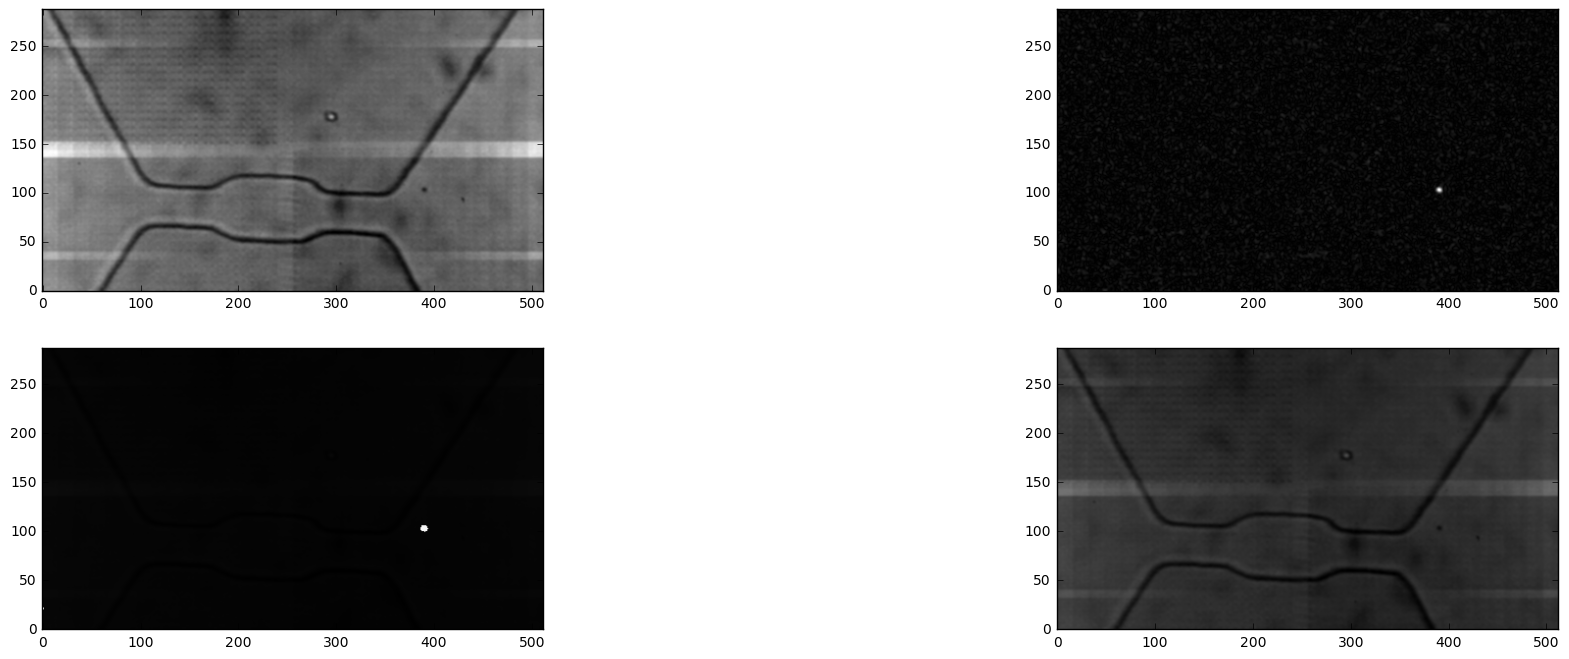

In [10]:
reload(oi)



index = 2722



# Parameters
threshold_difference = .005#.035
cluster_threshold = 50
blur = True
blur_kernel = (5,5)
diag = True
connect = True
connect_threshold = 25





template_frame = preprocess_frame(oi_vid.get_frame(template_index), blur_kernel)
raw_frame = preprocess_frame(oi_vid.get_frame(index), blur_kernel)
frame = preprocess_frame(oi_vid.get_frame(index), blur_kernel)




neg_frame = abs(frame - template_frame)
clusters = oi.find_clusters_percentage_based(frame, template_frame, threshold_difference = threshold_difference,\
                                             cluster_threshold = cluster_threshold, diag = diag, connect = connect, connect_threshold = connect_threshold)
temp_neg_frame = np.copy(neg_frame)
temp_neg_frame[temp_neg_frame > threshold_difference] = 1
temp_neg_frame[temp_neg_frame <= threshold_difference] = 0

print 'detected clusters = ', len(clusters)



fig, axes = plt.subplots(2,2,figsize=(24,8))

# Raw image
plt.sca(axes[0,0])
plt.imshow(frame, cmap = 'gray', origin = 'lower')



# Negative
plt.sca(axes[0,1])
plt.imshow(neg_frame, cmap = 'gray', origin = 'lower')



# Thresholded negative
plt.sca(axes[1,0])
plt.imshow(temp_neg_frame, vmin = 0, vmax = 1, cmap = 'gray', origin = 'lower')
plt.imshow(template_frame, cmap = 'gray', origin = 'lower', alpha = 0.05)

# Color frame
color_frame = np.zeros((frame.shape[0], frame.shape[1], 3))
for cluster in clusters:
    rand_color = [np.random.rand(), np.random.rand(), np.random.rand()]
    for pixel in cluster:
        color_frame[pixel[0], pixel[1],:] = rand_color

plt.sca(axes[1,1])
plt.imshow(raw_frame, cmap = 'gray', origin = 'lower')
plt.imshow(color_frame, alpha = 0.55, origin = 'lower')

plt.show()

### Find events

In [ ]:
reload(oi)
oi_events = oi.find_events(oi_vid, ti = 0, template_frame = oi_vid.get_frame(template_index), threshold_difference = threshold_difference, cluster_threshold = cluster_threshold, blur = blur, kernel = blur_kernel, diag = diag, connect = connect, connect_threshold = connect_threshold)

/home/prestonh/Desktop/Research/pore_stats//pore_stats/oi/optical_imaging.py:1252: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template_frame == None:
/home/prestonh/Desktop/Research/pore_stats//pore_stats/oi/optical_imaging.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


t:  1000 / 199893 	clusters: 0 	active: 1 	inactive: 17 	projected time: 2136.56590959  (s)
t:  2000 / 199893 	clusters: 0 	active: 0 	inactive: 55 	projected time: 3560.38816254  (s)
t:  3000 / 199893 	clusters: 0 	active: 0 	inactive: 64 	projected time: 1064.32655166  (s)
t:  4000 / 199893 	clusters: 0 	active: 0 	inactive: 65 	projected time: 1189.10655282  (s)
t:  5000 / 199893 	clusters: 0 	active: 0 	inactive: 71 	projected time: 3490.07971928  (s)


### Inspect trajectories

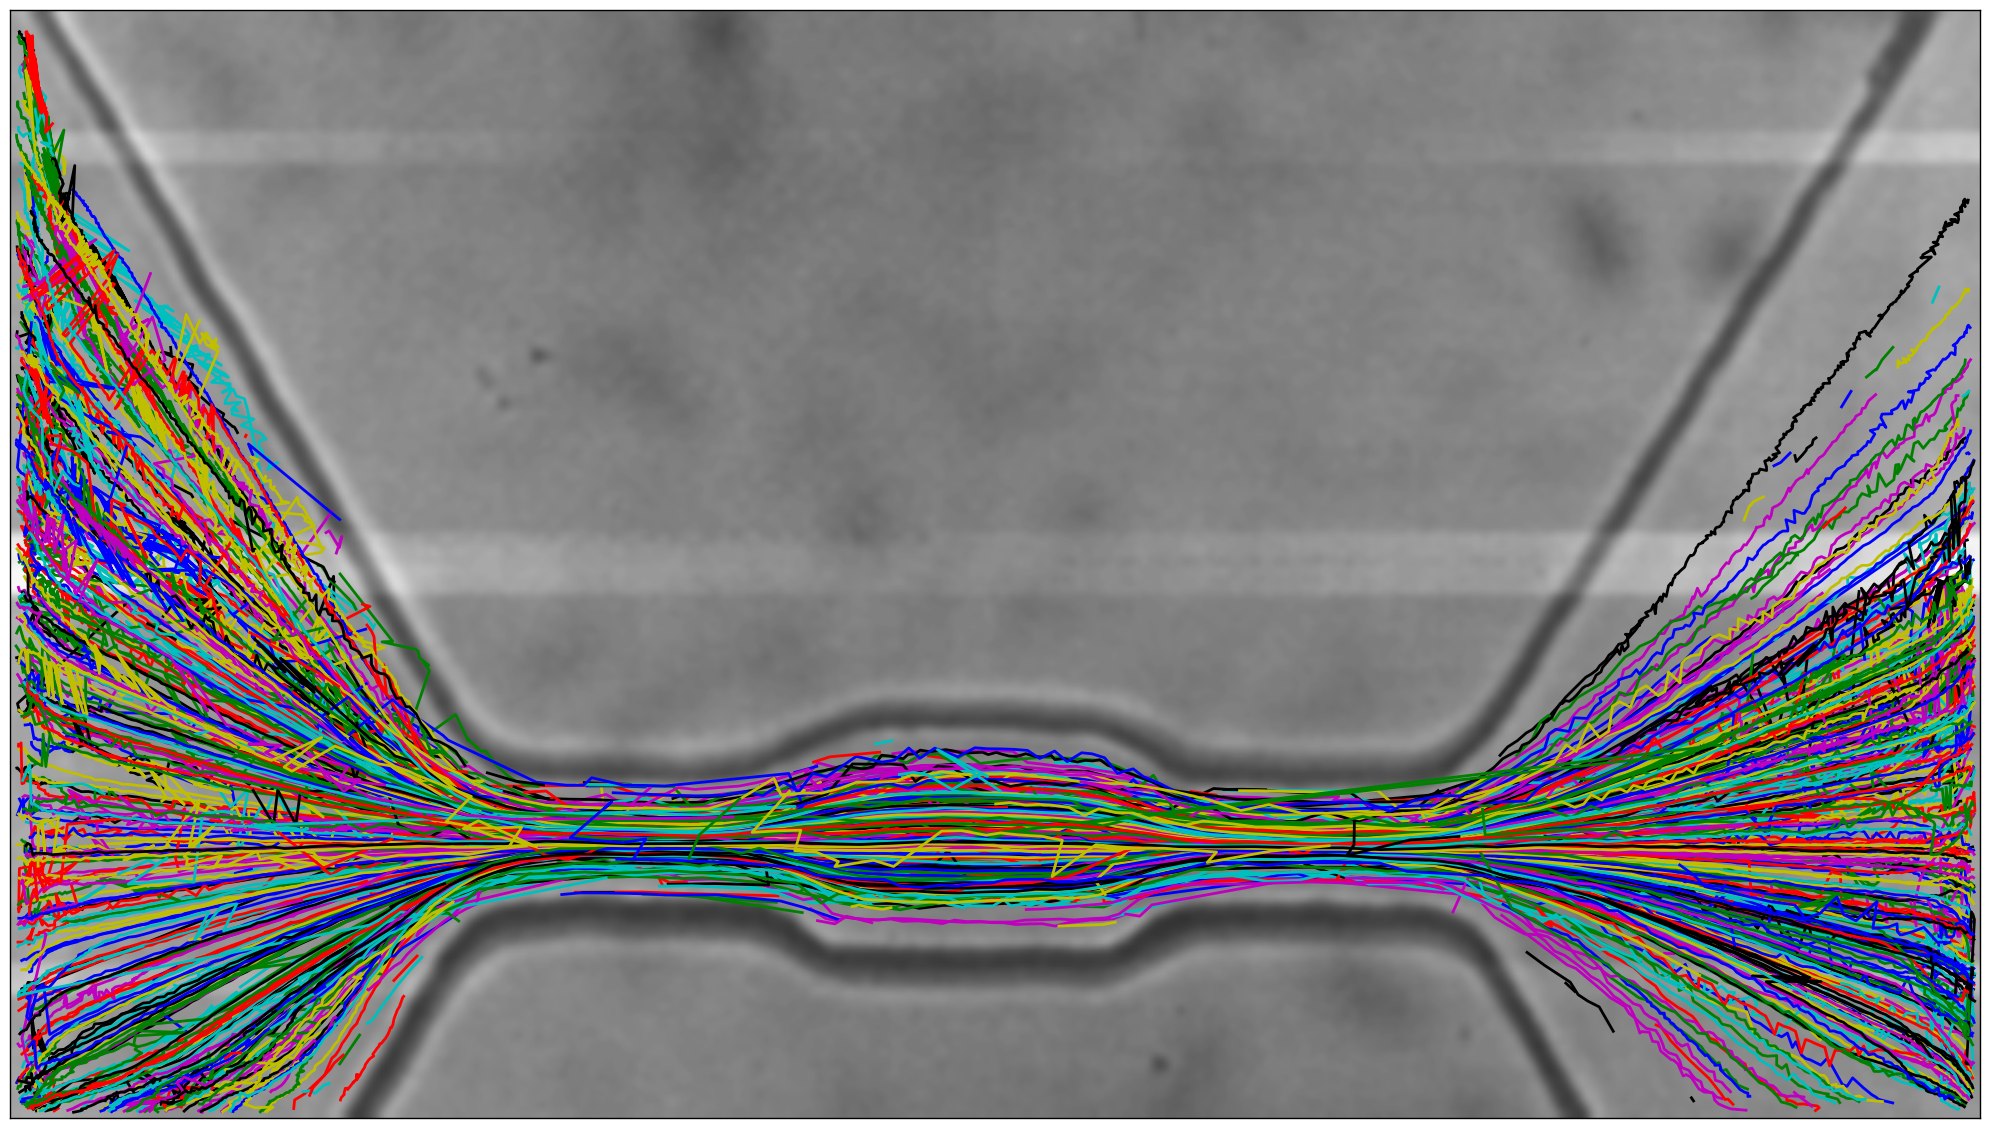

In [11]:
fig = plt.figure(figsize = (20,12))
for i, event in enumerate(oi_events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 2)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()


plt.show()

### Filter events

[ 0.01190392  0.99992915]


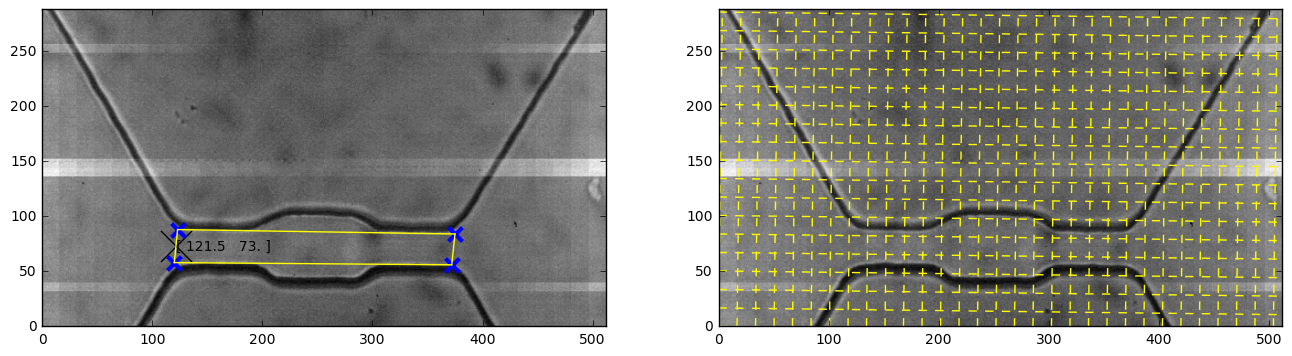

In [49]:
reload(oi)
template_index = 0
template_frame = oi_vid.get_frame(template_index)
c0 = [123,88]
c1 = [120,58]
c2 = [372,56]
c3 = [375,84]
oi_stage = oi.Stage(template_frame, c0, c1, c2, c3)
oi_stage._length_microns = 150
oi_stage.plot_stage()

In [50]:
for oi_event in oi_events:
    oi_event.get_channel_enter_exit_tf(oi_stage)

In [51]:
filtered_oi_events = [oi_event for oi_event in oi_events if (oi_event._channel_enter_tf != None) and (oi_event._channel_exit_tf != None)]
print len(filtered_oi_events)

221


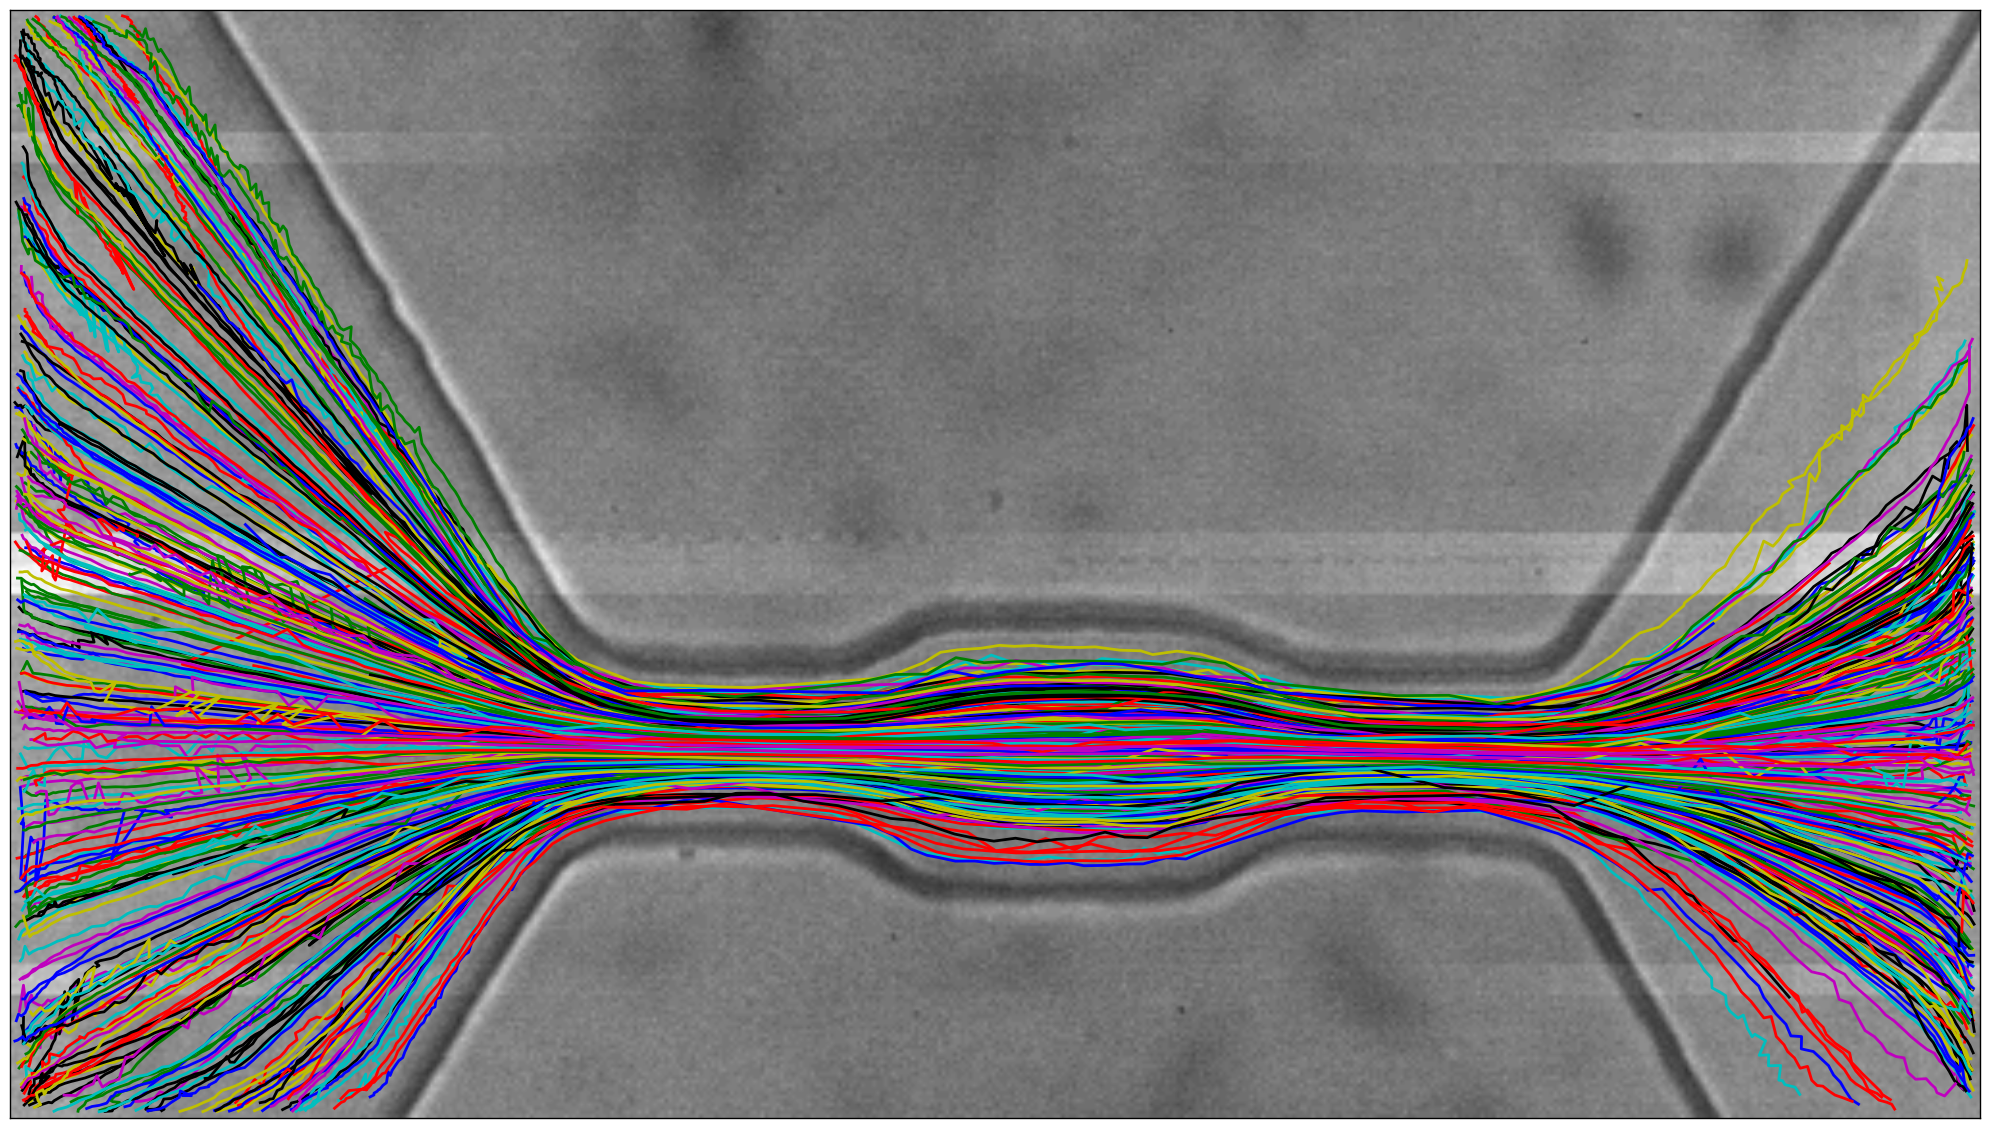

In [22]:
fig = plt.figure(figsize = (20,12))
for i, event in enumerate(filtered_oi_events[:]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py, lw = 2)

plt.imshow(template_frame, alpha=0.8, cmap = 'gray', origin = 'lower')
plt.xticks([])
plt.yticks([])

fig.tight_layout()


plt.show()

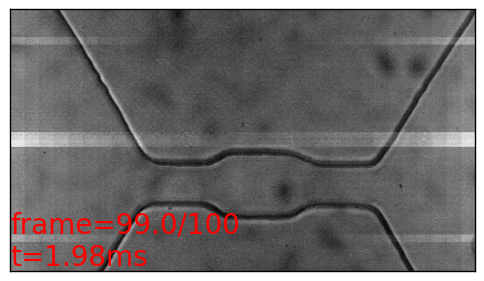

In [23]:
oi_index = 47
reload(oi_file)
plt.close()
HTML(oi_file.make_animation(oi_vid, filtered_oi_events[oi_index]._detections[0]._tf, filtered_oi_events[oi_index]._detections[-1]._tf).to_html5_video())

### Save events

In [52]:
print output_file_path

/home/prestonh/Desktop/Research/cancer_cells/data/7-17-2017/293-T/15-30-15_0/oi/bin/test_camera_0_events.json


In [53]:
oi_file.save_oi_events_json(output_file_path, filtered_oi_events)
print 'saved!'

saved!
